<a href="https://colab.research.google.com/github/bindu0501/SCT_ML/blob/main/Hand_geusture_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gti_upm_leapgestrecog_path = kagglehub.dataset_download('gti-upm/leapgestrecog')

print('Data source import complete.')


2025-07-02 08:59:48.474497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751446788.724492      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751446788.800407      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading images...
Loaded: 2000 images


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-02 09:00:22.212182: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Training model...
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.5723 - loss: 1.3950 - val_accuracy: 1.0000 - val_loss: 0.0157
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9898 - loss: 0.0413 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9993 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9967 - loss: 0.0121 - val_accuracy: 1.0000 - val_loss: 8.4025e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 1.0025e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 1.5034e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 1.0000 - loss: 7.6112e-04 - val_accuracy: 1.0000 - val_loss: 4.2602e-05
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9996 - l

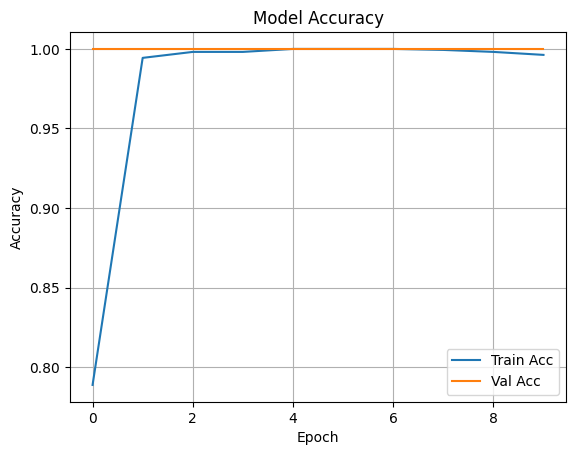

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Dataset path
data_dir = "/kaggle/input/leapgestrecog/leapGestRecog/00"

# Parameters
img_size = 64  # Resize to 64x64
X = []
y = []

#  Load and preprocess images
print("Loading images...")
for label in sorted(os.listdir(data_dir)):
    folder = os.path.join(data_dir, label)
    if not os.path.isdir(folder):
        continue
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # grayscale
        img = cv2.resize(img, (img_size, img_size))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)
print("Loaded:", X.shape[0], "images")

#  Reshape and normalize
X = X.reshape(-1, img_size, img_size, 1) / 255.0

#  Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Step 4: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("Training model...")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

#  Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("\nTest Accuracy:", round(acc * 100, 2), "%")

# Step 8: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()